In [44]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from src.utils import apply_matplotlib_settings
from numba import njit, prange

apply_matplotlib_settings()

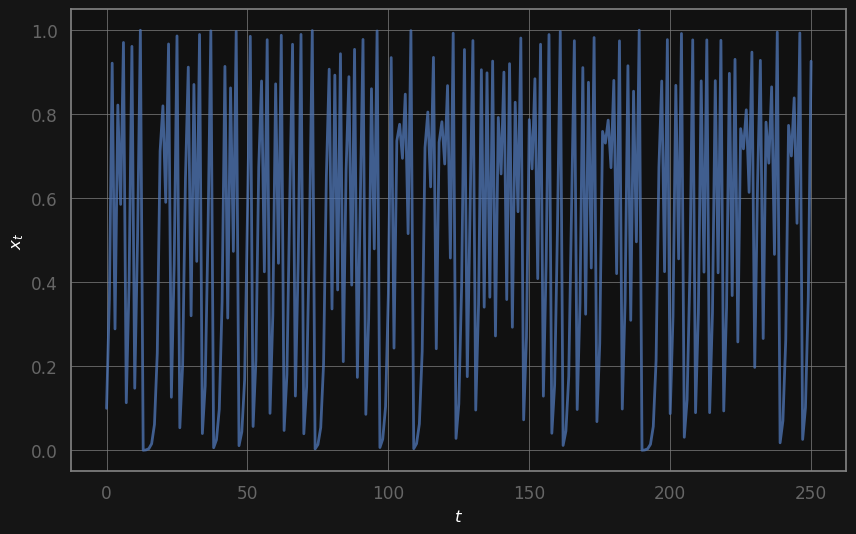

In [4]:
a = 4.0


def qm(x0, n):
    x = np.empty(n + 1)
    x[0] = x0
    for t in range(n):
        x[t + 1] = a * x[t] * (1 - x[t])
    return x


x = qm(0.1, 250)
fig, ax = plt.subplots()
ax.plot(x, "b-", lw=2, alpha=0.8)
ax.set_xlabel("$t$", fontsize=12)
ax.set_ylabel("$x_{t}$", fontsize=12)
plt.show()

In [8]:
qm_numba = njit(qm)

n = 10_000_000
qe.tic()
qm(0.1, int(n))
time_1 = qe.toc()
time_1

TOC: Elapsed: 0:00:7.70


7.709109783172607

In [9]:
qe.tic()
qm_numba(0.1, int(n))
time_2 = qe.toc()
time_2

TOC: Elapsed: 0:00:0.26


0.2674880027770996

In [12]:
@njit
def bootstrap(data, statistics, n):
    bootstrap_stat = np.empty(n)
    n = len(data)
    for i in range(n_resamples):
        resample = np.random.choice(data, size=n, replace=True)
        bootstrap_stat[i] = statistics(resample)
    return bootstrap_stat


@njit
def mean(data):
    return np.mean(data)


data = np.array([2.3, 3.1, 4.3, 5.9, 2.1, 3.8, 2.2])
n_resamples = 10

print("Type of function:", type(mean))

# Error
try:
    bootstrap(data, mean, n_resamples)
    print(bootstrap.signatures)
except Exception as e:
    print(e)

Type of function: <class 'numba.core.registry.CPUDispatcher'>
[(array(float64, 1d, C), type(CPUDispatcher(<function mean at 0x7f3d68f9ea70>)), int64)]


### Exercises

In [53]:
@njit
def monte_carlo_pi(sample_size: int):
    in_circle = 0
    points = np.random.rand(sample_size, 2) - 0.5
    for point in points:
        distance = np.sqrt((point**2).sum())
        if distance <= 0.5:
            in_circle += 1
    pi_approx = in_circle / sample_size / (0.5**2)
    return pi_approx


monte_carlo_pi(1e8)

3.14145788